In [1]:
import os
import re
import sys
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import locomotion

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
json_path = '/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results/AllCurvesCTRL.json'
        # Load all animals
animals = locomotion.get_animal_objs(json_path)
for a in animals:
    locomotion.trajectory.get_curve_data(a)
bdds = locomotion.trajectory.compute_all_bdd(animals, ['Velocity', 'Curvature'], 0, 1, 'spec')

LOG: Extracting coordinates for Animal CRV_00_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_01_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_02_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_03_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_04_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_05_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_06_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_07_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_08_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_09_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_10_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_11_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_12_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_13_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_14_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_15_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_16_TEST_CTRL.

In [17]:
bdds_new = []
#len(bdds[0])
#len(bdds[5])
for i in range(50):
    bdds_temp = bdds[i]
    bdds_temp = bdds_temp[(i+1):50]
    for a in bdds_temp:
        bdds_new.append(a)

In [18]:
bdds_new

[0.0565522048021388,
 0.048904559867581375,
 0.04406261771599887,
 0.04191240761651414,
 0.057992127399997914,
 0.057548054327106524,
 0.051931391826295165,
 0.045559501098411906,
 0.06838692123979428,
 0.04884905925493748,
 0.0465515406788777,
 0.0488979663527245,
 0.052106588570453104,
 0.03927770278798365,
 0.0734057260923975,
 0.04951452857813749,
 0.05149208852216348,
 0.077277041086772,
 0.047353339241721,
 0.06886191581202496,
 0.059317965869535826,
 0.05519721617162497,
 0.05292355916028184,
 0.043751043382300986,
 0.05116103666264065,
 0.08439843649007338,
 0.041869493089518796,
 0.03521543544813284,
 0.05029825768622005,
 0.053235437459088715,
 0.05476348816789256,
 0.04934106606036697,
 0.07542661428405496,
 0.04455481268253427,
 0.050614012660140234,
 0.05195432884228977,
 0.04169230861754337,
 0.04606278825186046,
 0.04095855458630652,
 0.05477032636070531,
 0.05294667470408545,
 0.06600998793202212,
 0.03643004072954174,
 0.09827535298973016,
 0.07139992378705402,
 0.0557

(0.0, 160.0)

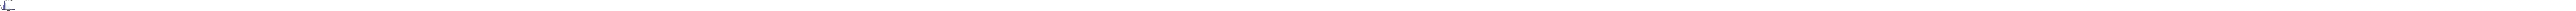

In [19]:
n, bins, patches = plt.hist(x= bdds_new, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('BDD value')
plt.ylabel('Frequency')
plt.title('BDD Values for 50 control curves')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2511d2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2511dd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25117650>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25122810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25122d10>],
 'means': []}

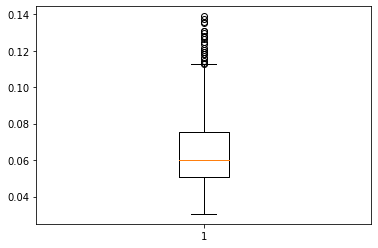

In [20]:
plt.boxplot(bdds_new)

In [21]:
data = pd.DataFrame(bdds)

In [23]:
data.columns = list(range(50))

In [25]:
data['curve_no'] = list(range(0,50))
data = data.melt(id_vars=["curve_no"],var_name= "curve_no2", value_name= "Value")

In [58]:
data_raw = pd.DataFrame(bdds)

In [60]:
data_raw.iloc[:, 44]

0     0.0982754
1      0.129833
2      0.124788
3      0.114579
4     0.0914955
5      0.137299
6      0.110958
7      0.127916
8      0.123641
9      0.094448
10     0.101242
11     0.103212
12      0.11832
13     0.118308
14     0.110347
15     0.103147
16    0.0918242
17     0.112836
18     0.103915
19     0.108814
20    0.0964984
21     0.119218
22     0.104607
23     0.135917
24    0.0911465
25     0.109896
26    0.0973611
27     0.107484
28     0.116284
29     0.112455
30     0.112495
31     0.121538
32     0.127752
33     0.120511
34      0.13893
35     0.126457
36     0.109693
37     0.109902
38     0.106663
39     0.119425
40     0.135165
41     0.106518
42     0.113257
43     0.108289
44             
45             
46             
47             
48             
49             
Name: 44, dtype: object

In [61]:
data_raw.iloc[:, 28]

0     0.0352154
1     0.0640053
2     0.0563742
3     0.0382362
4     0.0584237
5     0.0625281
6     0.0560087
7     0.0586523
8     0.0426656
9     0.0827687
10    0.0601608
11    0.0612765
12    0.0528508
13    0.0543713
14    0.0484812
15    0.0713571
16    0.0595531
17      0.06121
18    0.0816508
19    0.0453979
20     0.074253
21    0.0656249
22    0.0634136
23    0.0621392
24    0.0511346
25    0.0610334
26    0.0978419
27     0.052618
28             
29             
30             
31             
32             
33             
34             
35             
36             
37             
38             
39             
40             
41             
42             
43             
44             
45             
46             
47             
48             
49             
Name: 28, dtype: object

In [62]:
data_raw.iloc[:, 34]

0     0.0445548
1     0.0624001
2     0.0546412
3     0.0440185
4     0.0672423
5     0.0602062
6     0.0545814
7     0.0485455
8     0.0420301
9      0.085197
10    0.0638024
11    0.0660347
12    0.0462676
13    0.0564177
14    0.0529281
15    0.0801821
16    0.0696895
17    0.0616202
18    0.0909198
19    0.0464908
20    0.0846545
21    0.0597037
22     0.074305
23    0.0569243
24    0.0603655
25    0.0606549
26     0.107716
27    0.0548445
28     0.039589
29     0.050991
30    0.0597205
31    0.0492235
32    0.0566868
33    0.0837224
34             
35             
36             
37             
38             
39             
40             
41             
42             
43             
44             
45             
46             
47             
48             
49             
Name: 34, dtype: object

In [63]:
data_raw.iloc[:, 38]

0     0.0460628
1     0.0715434
2     0.0560397
3     0.0422982
4     0.0477591
5     0.0641735
6     0.0452317
7     0.0582659
8     0.0577599
9     0.0710562
10    0.0674083
11    0.0532889
12    0.0485826
13    0.0473256
14    0.0447003
15     0.065299
16    0.0642901
17     0.062446
18     0.090538
19    0.0510116
20    0.0834076
21    0.0565851
22    0.0706262
23    0.0631703
24     0.042599
25    0.0471674
26    0.0880746
27     0.045353
28    0.0510323
29    0.0495616
30    0.0616102
31    0.0521948
32    0.0675716
33    0.0912682
34    0.0496597
35    0.0522373
36    0.0475244
37    0.0597416
38             
39             
40             
41             
42             
43             
44             
45             
46             
47             
48             
49             
Name: 38, dtype: object